## Housing Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 1460 rows, 81 columns, no null values
# dtypes: float64(3), int64(35), object(43)
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Describe housing dataset
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Head
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Understanding the Data Dictionary


#### Let's split numeric and categorical data.
- numerical values are either of type int or float
- categorical values are of type object

In [6]:
datatype_columns = housing.dtypes #type of each feature in data: int, float, object
numerical_columns = datatype_columns[(datatype_columns == 'int64') | (datatype_columns == 'float64')] 
categorical_columns = datatype_columns[datatype_columns == 'object']

In [7]:
pd.DataFrame(datatype_columns).value_counts()

object     43
int64      35
float64     3
dtype: int64

##### Converting numerical_train and categorical_train to list to help with easy operations

In [8]:
numerical_columns_list = numerical_columns.index
categorical_columns_list = categorical_columns.index
print (f"Numerical Features in dataset: {numerical_columns_list}, \n Categorical Features in dataset: {categorical_columns_list}")

Numerical Features in dataset: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object'), 
 Categorical Features in dataset: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

#### Finding dataset with null and na values

In [9]:
# Ratio of columns having null values (out of 1)
round((pd.isnull(housing).sum()/len(housing.index)),2)[pd.isnull(housing).sum() > 0].sort_values()

Electrical      0.00
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageCond      0.06
GarageQual      0.06
GarageFinish    0.06
GarageType      0.06
GarageYrBlt     0.06
LotFrontage     0.18
FireplaceQu     0.47
Fence           0.81
Alley           0.94
MiscFeature     0.96
PoolQC          1.00
dtype: float64

##### Considering 90% as threshold for dropping columns with null values 

In [10]:
round((pd.isnull(housing).sum()/len(housing.index)),2)[pd.isnull(housing).sum()/ len(housing.index) > 0.9].sort_values()

Alley          0.94
MiscFeature    0.96
PoolQC         1.00
dtype: float64

Now from data_description.txt, we could see that NA is one of the values for multiple columns.

Hence replacing NA with some value as N.A. such that we could work upon null values in a better way.


In [11]:
# Features having NA with meaning using data_description.txt

na_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", \
                  "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", \
                  "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in na_has_meaning:
    housing[i].fillna("N.A.", inplace=True)

In [12]:
# Ratio of columns having null values (out of 1)
round((pd.isnull(housing).sum()/len(housing.index)),2)[pd.isnull(housing).sum() > 0].sort_values()

Electrical     0.00
MasVnrType     0.01
MasVnrArea     0.01
GarageYrBlt    0.06
LotFrontage    0.18
dtype: float64

In [13]:
# Updated housing dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### As we could see that:
##### 1. Electrical, MasVnrType: are categorical, hence we could replace with None
##### 2. LotFrontage, MasVnrArea, GarageYrBlt: are numeric, hence we could impute as median to handle NA

In [14]:
# Categorical 
housing["Electrical"].fillna("N.A.", inplace=True)
housing["MasVnrType"].fillna("N.A.", inplace=True)

# Numeric
housing["LotFrontage"].fillna(housing["LotFrontage"].median(), inplace=True)
housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].median(), inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].median(), inplace=True)

##### Out of the features which are related to age/date, it would be better if we have the difference from the most recent date.
Existing coloumns like this are: YearBuilt, YearRemodAdd, GarageYrBlt, YrSold, GarageYrBlt_Old

So in order to get the diff, we could do something as below example.

Eg: For YearBuilt, most recent year is 2010. So we will create a new column capturing how old is the house constructed wrt this year.


In [15]:
years_related_columns = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]
for var in years_related_columns:
    housing[var + "_diff"] = max(housing[var]) - housing[var]

##### Dropping the actual Year columns

In [16]:
#print (type(years_related_columns))
housing.drop(["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"], axis = 'columns', inplace = True)

In [17]:
# Dropping MoSold since we are going with the logic of diff in years
housing.drop(columns=["MoSold"], inplace=True)

In [18]:
# Ratio of columns having null values (out of 1)
round((pd.isnull(housing).sum()/len(housing.index)),2)[pd.isnull(housing).sum() > 0].sort_values()

Series([], dtype: float64)

##### Dropping rows which are empty

In [19]:
housing.dropna(axis=0, inplace=True)

##### Dropping "Id" column since it is redundant

In [20]:
housing.drop(columns="Id", inplace=True)

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   Street             1460 non-null   object 
 5   Alley              1460 non-null   object 
 6   LotShape           1460 non-null   object 
 7   LandContour        1460 non-null   object 
 8   Utilities          1460 non-null   object 
 9   LotConfig          1460 non-null   object 
 10  LandSlope          1460 non-null   object 
 11  Neighborhood       1460 non-null   object 
 12  Condition1         1460 non-null   object 
 13  Condition2         1460 non-null   object 
 14  BldgType           1460 non-null   object 
 15  HouseStyle         1460 non-null   object 
 16  OverallQual        1460 

### Plotting heatmap to check the corellation between varables

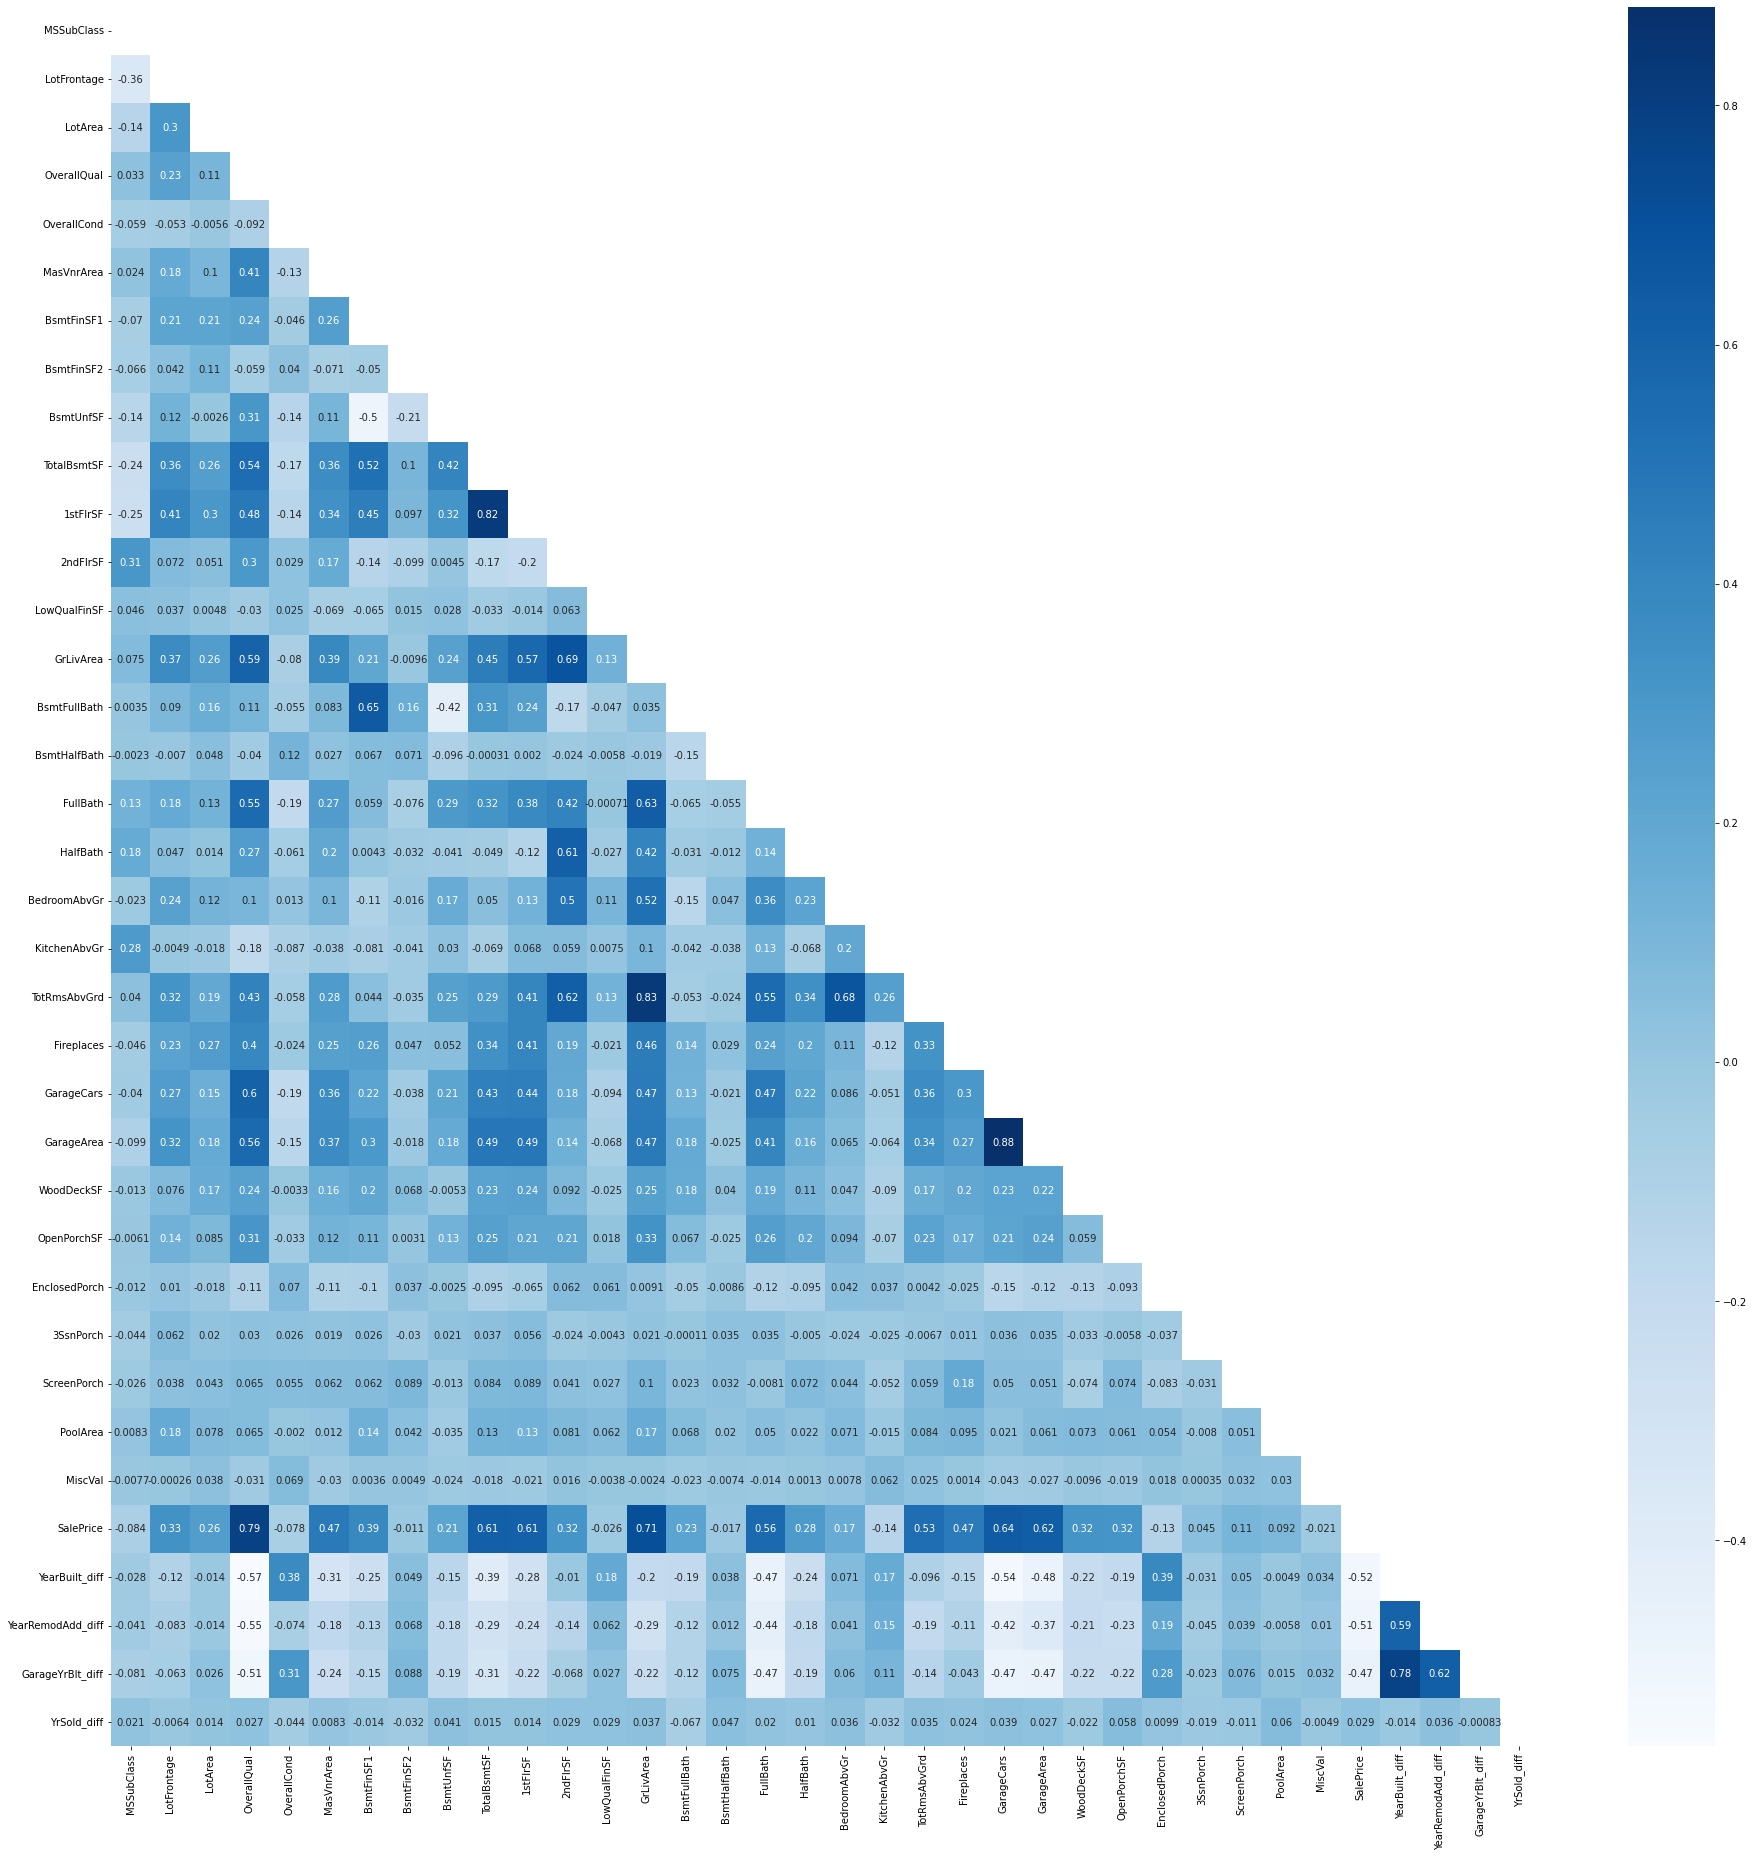

In [22]:
plt.figure(figsize = (32, 32))
matrix = np.triu(housing.corr())
sns.heatmap(housing.corr(), annot = True, cmap="Blues", mask=matrix)
plt.show()

##### Features with High Correlation:
##### -1stFlrSf with TotalBsmtSf 0.82
##### -TotRmsAbvGrd with GrLivArea 0.83
##### -GarageArea with GarageCars 0.88
##### -GarageYrBlt_diff with YearBuilt_diff 0.78
##### 

##### Features with Low Correlation with Saleprice:
##### -MSSubClass
##### -OverallCond
##### -BsmtFinSF2
##### -LowQualFinSF
##### -BSMTHalfBath
##### -MiscVCal

##### We could see here that many columns have strong correlation with 'SalePrice'. 

##### Hence plotting Saleprice correlation matrix for the top one's.

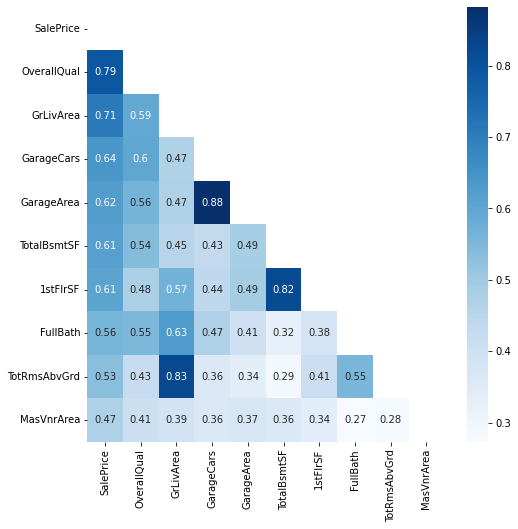

In [23]:
k = 10 #number of variables for heatmap
plt.figure(figsize=(8,8))
columns = housing.corr().nlargest(k, 'SalePrice')['SalePrice'].index
matrix = np.triu(columns)
cm = np.corrcoef(housing[columns].values.T)
hm = sns.heatmap(cm, cmap="Blues", cbar=True, annot=True, xticklabels=columns.values, yticklabels=columns.values, mask=matrix)
plt.show()

##### Plotting scatter plot to understand correlation further between SalePrice and these selected features.

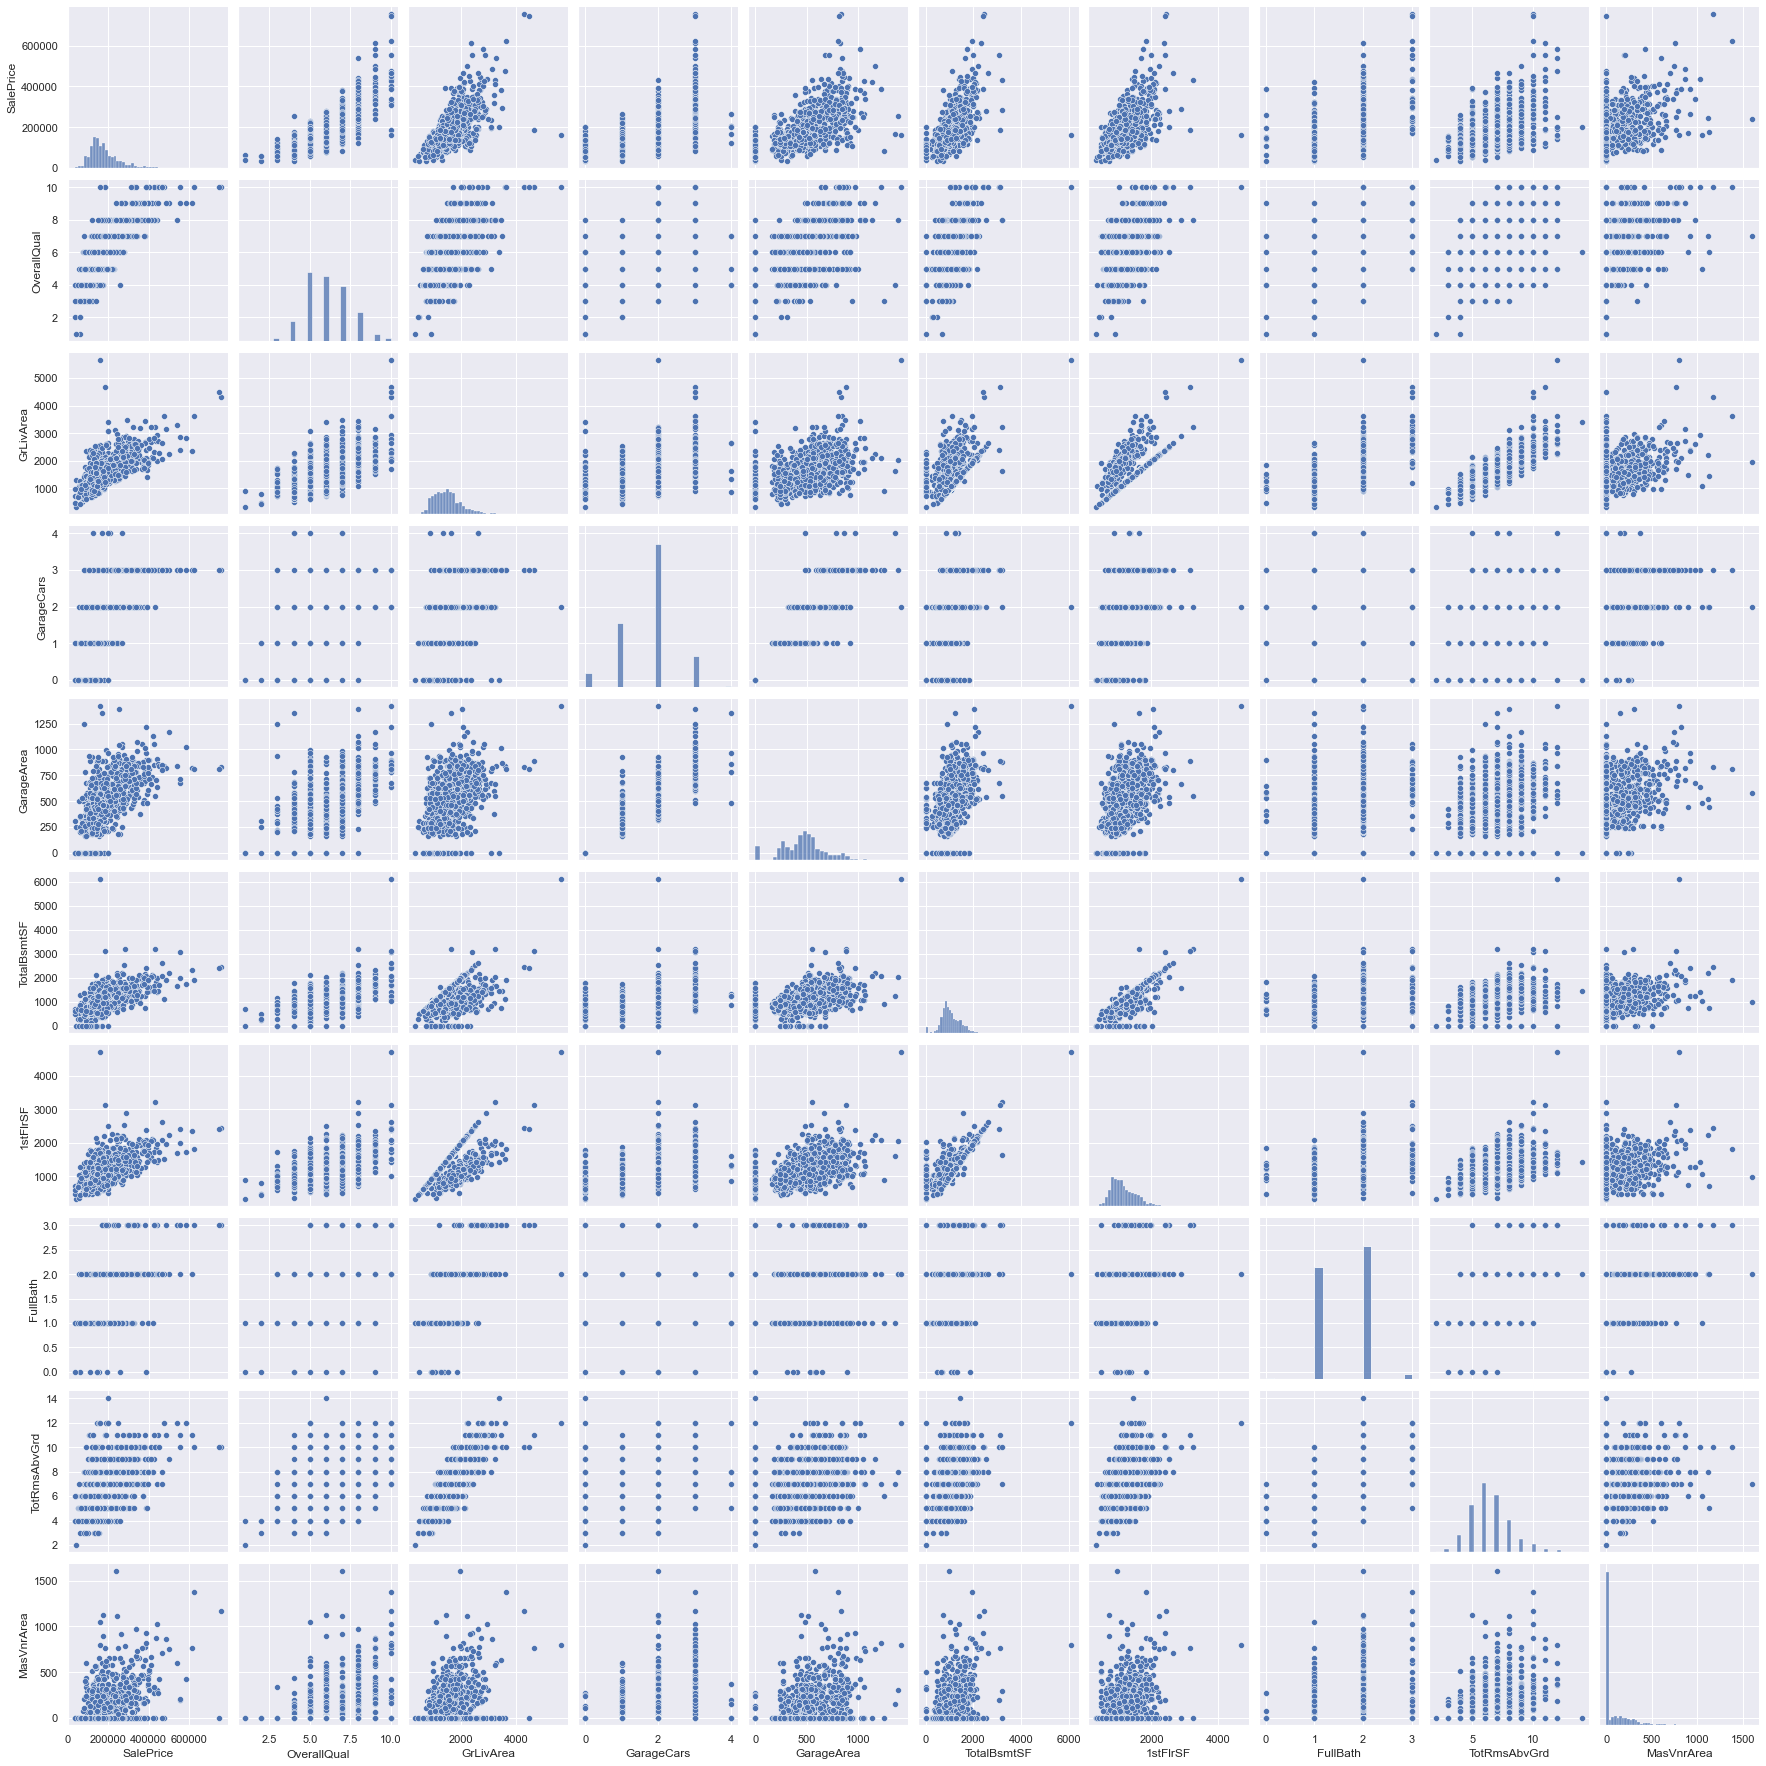

In [24]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
           'FullBath','TotRmsAbvGrd', 'MasVnrArea']
sns.pairplot(housing[columns])
plt.show();

#### Handling Outliers

In [25]:
# Updated Columns
datatype_columns = housing.dtypes
numerical_columns = datatype_columns[(datatype_columns == 'int64') | (datatype_columns == 'float64')]
categorical_columns = datatype_columns[datatype_columns == 'object']
numerical_columns_list = numerical_columns.index
categorical_columns_list = categorical_columns.index

In [26]:
def drop_outliers(df, columns_list):
    list = []
    for col in columns_list:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.99)
        IQR = Q3-Q1
        df =  df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 
    return df   

housing = drop_outliers(housing, numerical_columns_list)

In [27]:
housing.shape

(1439, 79)

#### Analyzing Features Based on skewness of categories

In [28]:
categorical_columns_list

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

##### Checking value_counts to check varience for respective categorical feature

In [29]:
for column in categorical_columns_list:
    print (f"{column} has number of categories as : {housing[column].unique()}")
    print (f"{housing[column].value_counts()}\n")

MSZoning has number of categories as : ['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1131
RM          217
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street has number of categories as : ['Pave' 'Grvl']
Pave    1434
Grvl       5
Name: Street, dtype: int64

Alley has number of categories as : ['N.A.' 'Grvl' 'Pave']
N.A.    1348
Grvl      50
Pave      41
Name: Alley, dtype: int64

LotShape has number of categories as : ['Reg' 'IR1' 'IR2' 'IR3']
Reg    915
IR1    478
IR2     38
IR3      8
Name: LotShape, dtype: int64

LandContour has number of categories as : ['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1296
Bnk      62
HLS      48
Low      33
Name: LandContour, dtype: int64

Utilities has number of categories as : ['AllPub' 'NoSeWa']
AllPub    1438
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig has number of categories as : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1041
Corner      257
CulDSac      90
FR2          47
FR3           4
Name: LotConfig,

##### Checking value_counts to check varience for respective categorical feature

##### We could see here that , following columns are very skewed with respect to categories:
#####  'MiscFeature', 'PoolQC', 'Heating', 'Condition2', 'RoofMatl', 'Street', 'Utilities', 
##### 'Alley', 'LandSlope', 'Functional', 'Electrical', 'GarageCond', ', 'CentralAir',
##### 'BsmtCond', 'LandContour'
'GarageQual', 'BsmtCond', 'LandContour'

##### Hence dropping these. 

In [30]:
housing.drop(columns=['MiscFeature','PoolQC','Heating','Condition2','RoofMatl','Street',
                      'Utilities','Alley','LandSlope', 'Functional', 'Electrical', 
                      'CentralAir', 'GarageCond', 'CentralAir'],inplace=True)

In [31]:
# Updated Columns
datatype_columns = housing.dtypes
numerical_columns = datatype_columns[(datatype_columns == 'int64') | (datatype_columns == 'float64')]
categorical_columns = datatype_columns[datatype_columns == 'object']
numerical_columns_list = numerical_columns.index
categorical_columns_list = categorical_columns.index

In [32]:
housing.shape

(1439, 66)

##### Checking value_counts to check varience for respective numerical feature

In [33]:
for column in numerical_columns_list:
    print (f"{column} has number of categories as : {housing[column].unique()}")
    print (f"{housing[column].value_counts()}\n")

MSSubClass has number of categories as : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
20     528
60     296
50     142
120     87
30      69
160     63
70      59
80      56
90      50
190     28
85      20
75      15
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

LotFrontage has number of categories as : [ 65.  80.  68.  60.  84.  85.  75.  69.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79.  67.  83.  43. 103. 174.  93.  30.
 129. 140.  35.  37. 118.  87. 116. 111.  99.  49.  96.  59.  36.  56.
 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144. 114.
 128. 149. 168. 182. 138. 152. 124. 153.  46.]
69.0     263
60.0     141
70.0      69
80.0      68
50.0      57
        ... 
174.0      1
38.0       1
112.0     

##### We could see here that , following columns are very skewed with respect to categories:
##### --> LowQualFinSF, BsmtHalfBath, KitchenAbvGr, 3SsnPorch, ScreenPorch, PoolArea, MiscVal 

##### Hence dropping these.

In [34]:
housing.drop(columns=["LowQualFinSF", "BsmtHalfBath", "KitchenAbvGr", "3SsnPorch", "ScreenPorch", "PoolArea",
                     "MiscVal"], inplace=True)

In [35]:
# Updated Columns
datatype_columns = housing.dtypes
numerical_columns = datatype_columns[(datatype_columns == 'int64') | (datatype_columns == 'float64')]
categorical_columns = datatype_columns[datatype_columns == 'object']
numerical_columns_list = numerical_columns.index
categorical_columns_list = categorical_columns.index

In [36]:
# Updated shape for housing dataframe
housing.shape

(1439, 59)

## Data Preparation

### Preparing the data and build the model

##### Handle Categorical Variables

As our model only understand numerical values, we will convert all the categories to numeric equivalents/ dummies.

Below columns here we can clearly see that these are having some kind of order.
Hence we can say these are ordinal in nature¶

In [37]:
housing['ExterQual'] = housing.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['BsmtQual'] = housing.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtCond'] = housing.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtExposure'] = housing.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['BsmtFinType1'] = housing.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['BsmtFinType2'] = housing.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['HeatingQC'] = housing.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
#housing['CentralAir'] = housing.CentralAir.map({'N':0,'Y':1})
housing['KitchenQual'] = housing.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['GarageFinish'] = housing.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing['GarageQual'] = housing.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
#housing['GarageCond'] = housing.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['ExterCond'] = housing.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['LotShape'] = housing.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [38]:
ordinal_categorical_list = ['ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','KitchenQual','GarageFinish','GarageQual', 
             'ExterCond','LotShape'] 
print (housing[ordinal_categorical_list].head())
print (housing.shape)

   ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0          3       4.0       3.0           1.0           6.0           1.0   
1          2       4.0       3.0           4.0           5.0           1.0   
2          3       4.0       3.0           2.0           6.0           1.0   
3          2       3.0       4.0           1.0           5.0           1.0   
4          3       4.0       3.0           3.0           6.0           1.0   

   HeatingQC  KitchenQual  GarageFinish  GarageQual  ExterCond  LotShape  
0          4            3           2.0         3.0          2         3  
1          4            2           2.0         3.0          2         3  
2          4            3           2.0         3.0          2         0  
3          3            3           1.0         3.0          2         0  
4          4            3           2.0         3.0          2         0  
(1439, 59)


In [39]:
##### Remaining categorical features (removing the one processed in previous step)
unprocessed_categorical_columns_list = list(set(categorical_columns_list)-set(ordinal_categorical_list))
print (unprocessed_categorical_columns_list)

['Neighborhood', 'SaleType', 'Foundation', 'BldgType', 'Condition1', 'RoofStyle', 'Fence', 'Exterior1st', 'HouseStyle', 'SaleCondition', 'GarageType', 'MasVnrType', 'MSZoning', 'LandContour', 'PavedDrive', 'FireplaceQu', 'LotConfig', 'Exterior2nd']


In [40]:
# Create dummy variables and drop original columns >>> Discuss with KC
dummy_categorical_columns_df = pd.get_dummies(housing[unprocessed_categorical_columns_list], drop_first=True)

In [41]:
# concat dummy variables with X
housing = pd.concat([housing, dummy_categorical_columns_df], axis="columns")
print(housing.shape)
# drop categorical variables 
housing = housing.drop(categorical_columns_list, axis="columns")
print(housing.shape)

(1439, 186)
(1439, 156)


In [42]:
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,1,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,0,0,0,1,0,0


#### Checking the distribution of target variable 'SalePrice' before scaling and Splitting

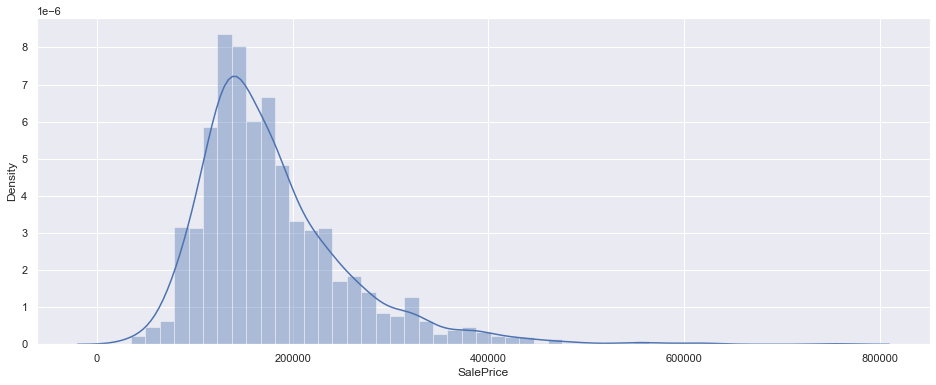

In [43]:
plt.figure(figsize=(16,6))
sns.distplot(housing["SalePrice"])
plt.show()

### Creating training and testing dataset for validation

In [44]:
# split into train and test
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=42)

In [45]:
numerical_columns_list 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice',
       'YearBuilt_diff', 'YearRemodAdd_diff', 'GarageYrBlt_diff',
       'YrSold_diff'],
      dtype='object')

In [46]:
# StandardScaler: scaling the numerical features 
# storing column names in cols 
# scaling (the dataframe is converted to a numpy array)

scaler = StandardScaler()
df_train[numerical_columns_list] = scaler.fit_transform(df_train[numerical_columns_list])
df_test[numerical_columns_list] = scaler.transform(df_test[numerical_columns_list])
df_train.shape, df_test.shape

((1007, 156), (432, 156))

#### Lets check the distribution again after scaling

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

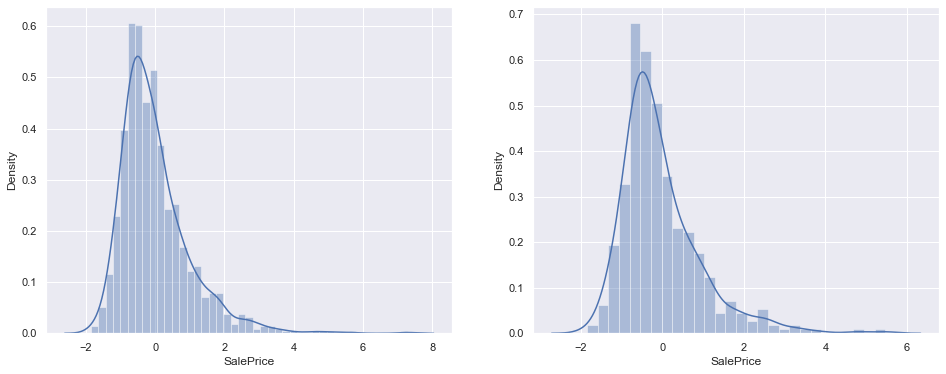

In [47]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

##### Spliting the dependent and independent variable

In [48]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [49]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Now using RFE lets try to to find the optimal number of feature


In [50]:
len(X_train.columns)

155

In [51]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=70) # Using n_features_to_select=70 to get started
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [52]:
rfe.ranking_

array([49, 73, 21,  1, 27, 41,  1,  1,  1,  1, 58,  1,  1, 50, 81, 55, 44,
       45,  6, 48,  1, 52, 86, 79, 22, 78, 56, 80, 23, 53,  7, 19, 11,  1,
        1, 12,  3,  1,  1,  1, 70,  1,  1,  1,  1,  1,  8,  9, 17,  1, 10,
       64, 31,  1, 26, 84,  1,  1,  1, 46, 74, 40,  1, 33,  1, 65,  1,  1,
        1, 62, 32,  1,  1,  1, 71, 43, 18,  1,  1,  1,  1,  1, 75, 68, 25,
       61,  1,  1, 20,  1, 24, 38,  1, 36, 42, 51,  1,  1, 60, 34, 28,  1,
       57,  1, 85, 39,  1,  1,  1, 54,  1,  1,  1, 15,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 83, 13, 63, 76, 16,  4, 14,  2,  5,
        1, 47,  1, 82,  1, 69, 66,  1, 72, 29, 67, 37,  1, 30, 77,  1,  1,
       59, 35])

In [53]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ['Column_Names', 'Status', 'Rank']

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 49),
 ('LotFrontage', False, 73),
 ('LotArea', False, 21),
 ('OverallQual', True, 1),
 ('OverallCond', False, 27),
 ('MasVnrArea', False, 41),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 58),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 50),
 ('FullBath', False, 81),
 ('HalfBath', False, 55),
 ('BedroomAbvGr', False, 44),
 ('TotRmsAbvGrd', False, 45),
 ('Fireplaces', False, 6),
 ('GarageCars', False, 48),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 52),
 ('OpenPorchSF', False, 86),
 ('EnclosedPorch', False, 79),
 ('YearBuilt_diff', False, 22),
 ('YearRemodAdd_diff', False, 78),
 ('GarageYrBlt_diff', False, 56),
 ('YrSold_diff', False, 80),
 ('Neighborhood_Blueste', False, 23),
 ('Neighborhood_BrDale', False, 53),
 ('Neighborhood_BrkSide', False, 7),
 ('Neighborhood_ClearCr', False, 19),
 ('Neighborhood_CollgCr', False, 11),
 ('Neighborhood_Crawfor', 

In [55]:
# Top columns to be selected using RFE
rfe_selected_columns = X_train.columns[rfe.support_]
rfe_selected_columns

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'GarageArea', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_StoneBr', 'SaleType_Con', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'Foundation_Slab', 'Foundation_Wood',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'HouseStyle_1Story',
       'HouseStyle_2.5Unf', 'HouseStyle_SLvl', 'SaleCondition_AdjLand'

#### Lets filter the train and test set for the RFE selected columns

In [56]:
X_train = X_train[list(rfe_selected_columns)]
X_test = X_test[list(rfe_selected_columns)]
X_train.shape, X_test.shape


((1007, 70), (432, 70))

## Modelling 

We will first create our Baseline models with all features using

1. Linear Regression
2. Lasso 
3. Ridge 

Then we will peform RFE, followed by feature selection using p-value and VIF.<br>
We can then use the remaining features to create Ridge/Lasso models and perform hyperparameter tuning.


### Linear Regression
### Predicting 'SalePrice' using linear regression.

In [57]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)


-1.2827816282610789
[ 2.78782522e-01 -3.50187714e+12 -1.40313022e+12 -3.52821698e+12
  3.32906431e+12  1.01951180e-01  3.05957631e-01  1.35272050e-01
  3.42251457e-01 -2.04554294e-01  2.36782782e-01 -1.32269445e-01
 -1.12475126e-01 -1.67169916e-01  4.61179799e-01  5.14254566e-01
 -1.77130804e-01 -1.88798994e-01  4.31055630e-01  2.24030013e-01
 -3.51074605e-01  4.58901853e-01  3.80382518e-01  2.59672807e-01
 -2.21840129e-01 -3.00541599e-01 -3.01764267e-01 -1.62268028e-01
 -1.69004171e-01 -5.65365532e-01 -2.57838241e-01  1.31543933e-01
  1.93842554e-01  1.76818848e-01  3.09913635e-01  5.33370972e-01
 -3.09250409e+09 -5.75046539e-01 -4.28622142e+10 -5.04987717e-01
  3.07373047e-01  1.72363281e-01  1.72821045e-01 -3.28002930e-01
  1.55242920e-01  5.32196045e-01  1.99798584e-01  1.62109375e-01
 -7.36083984e-02  1.38916016e-01  1.49200439e-01  6.88781738e-02
  1.41113281e-01  3.08746338e-01  2.60986328e-01  2.53616333e-01
  2.45727539e-01  3.20743561e-01  5.91629028e-01  4.04479980e-01
  4.6

In [59]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r-squared test: {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss train: {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss test: {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse train: {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse test: {mse_test_lr}")
metric.append(mse_test_lr**0.5)

r-squared train: 0.8736876678035098
r-squared test: -2.3518350710571304e+16
rss train: 127.19651852186556
rss test: 9.563581556198871e+18
mse train: 0.12631233219649013
mse test: 2.2137920268978868e+16


##### Since we see huge discrepancies in test data, looks like this is overfitting.
##### So will rerun with a lower n_features_to_select to check the behavior.

In [60]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=60)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=60)

In [61]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ['Column_Names', 'Status', 'Rank']

In [62]:
# Top columns to be selected using RFE
rfe_selected_columns = X_train.columns[rfe.support_]
rfe_selected_columns

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'GarageArea', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'SaleType_Con',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'Foundation_Slab',
       'Foundation_Wood', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Condition1_PosN', 'Condition1_RRAe',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior1st_Stucco', 'HouseStyle_2.5Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_N.A.',
       

In [63]:
X_train = X_train[list(rfe_selected_columns)]
X_test = X_test[list(rfe_selected_columns)]
X_train.shape, X_test.shape

((1007, 60), (432, 60))

In [64]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r-squared test: {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss train: {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss test: {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse train: {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse test: {mse_test_lr}")
metric.append(mse_test_lr**0.5)

r-squared train: 0.8648942741690311
r-squared test: -4.145683830463077e+19
rss train: 136.05146591178573
rss test: 1.6858148731078878e+22
mse train: 0.13510572583096894
mse test: 3.902349243305296e+19


##### Since we see huge discrepancies in test data, looks like this is overfitting.
##### So will rerun with a lower n_features_to_select to check the behavior.

In [66]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [67]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ['Column_Names', 'Status', 'Rank']

In [68]:
# Top columns to be selected using RFE
rfe_selected_columns = X_train.columns[rfe.support_]
rfe_selected_columns

Index(['OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_StoneBr',
       'SaleType_Con', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'Foundation_Wood', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Condition1_PosN', 'Condition1_RRAe',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stucco',
       'HouseStyle_2.5Unf', 'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'GarageType_N.A.', 'MasVnrType_BrkFace', 'MasVnrType_N.A.',
       'MasVnrType_None', 'MasVnrType_Stone', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'LotConfig_CulDS

In [69]:
X_train = X_train[list(rfe_selected_columns)]
X_test = X_test[list(rfe_selected_columns)]
X_train.shape, X_test.shape


((1007, 50), (432, 50))

In [70]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r-squared test: {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss train: {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss test: {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse train: {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse test: {mse_test_lr}")
metric.append(mse_test_lr**0.5)

r-squared train: 0.8611578366549817
r-squared test: 0.8340796211021051
rss train: 139.81405848843337
rss test: 67.47042320073004
mse train: 0.13884216334501825
mse test: 0.15618153518687508


##### We could see good values for r-squared matrix.
##### We will rerun with a lower n_features_to_select to check the behavior.


In [72]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=45)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=45)

In [73]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ['Column_Names', 'Status', 'Rank']

In [74]:
# Top columns to be selected using RFE
rfe_selected_columns = X_train.columns[rfe.support_]
rfe_selected_columns

Index(['OverallQual', 'BsmtFinSF1', 'GrLivArea', 'GarageArea',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'SaleType_Con',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'Foundation_Wood',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Condition1_PosN', 'Condition1_RRAe', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'HouseStyle_2.5Unf',
       'SaleCondition_AdjLand', 'SaleCondition_Normal', 'GarageType_N.A.',
       'MasVnrType_BrkFace', 'MasVnrType_N.A.', 'MasVnrType_None',
       'MasVnrType_Stone', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LotConfig_CulDSac', 'LotConfig_FR3',
       'Exterior2nd_AsphShn', 'Exterior2nd_Other'],
      dtype='object')

In [75]:
X_train = X_train[list(rfe_selected_columns)]
X_test = X_test[list(rfe_selected_columns)]
X_train.shape, X_test.shape


((1007, 45), (432, 45))

In [76]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r-squared test: {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss train: {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss test: {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse train: {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse test: {mse_test_lr}")
metric.append(mse_test_lr**0.5)

r-squared train: 0.8571742047616208
r-squared test: 0.8290579335604903
rss train: 143.82557580504783
rss test: 69.51245918127157
mse train: 0.14282579523837918
mse test: 0.16090847032701752


##### So with changing  n_features_to_select=45 from  n_features_to_select=50, difference between r-squared for train and test seems to be widening.
##### Also value for r-squared seem to be decresing, so we are going ahead with n_features_to_select=50

In [78]:
# split into train and test
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=42)

In [79]:
# StandardScaler: scaling the numerical features 
# storing column names in cols 
# scaling (the dataframe is converted to a numpy array)

scaler = StandardScaler()
df_train[numerical_columns_list] = scaler.fit_transform(df_train[numerical_columns_list])
df_test[numerical_columns_list] = scaler.transform(df_test[numerical_columns_list])
df_train.shape, df_test.shape

((1007, 156), (432, 156))

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

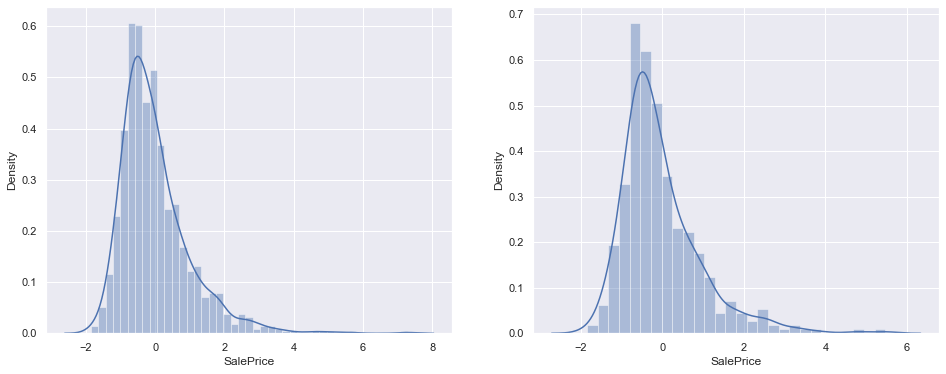

In [80]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [81]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [82]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [83]:
len(X_train.columns)

155

In [84]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [85]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ['Column_Names', 'Status', 'Rank']

In [86]:
# Top columns to be selected using RFE
rfe_selected_columns = X_train.columns[rfe.support_]
rfe_selected_columns

Index(['OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_StoneBr',
       'SaleType_Con', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'Foundation_Wood', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Condition1_PosN', 'Condition1_RRAe',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stucco',
       'HouseStyle_2.5Unf', 'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'GarageType_N.A.', 'MasVnrType_BrkFace', 'MasVnrType_N.A.',
       'MasVnrType_None', 'MasVnrType_Stone', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'LotConfig_CulDS

In [87]:
X_train = X_train[list(rfe_selected_columns)]
X_test = X_test[list(rfe_selected_columns)]
X_train.shape, X_test.shape


((1007, 50), (432, 50))

In [88]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

linear_regression_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
linear_regression_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r-squared test: {r2_test_lr}")
linear_regression_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss train: {rss1_lr}")
linear_regression_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss test: {rss2_lr}")
linear_regression_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse train: {mse_train_lr}")
linear_regression_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse test: {mse_test_lr}")
linear_regression_metric.append(mse_test_lr**0.5)

r-squared train: 0.8611578366549817
r-squared test: 0.8340796211021051
rss train: 139.81405848843337
rss test: 67.47042320073004
mse train: 0.13884216334501825
mse test: 0.15618153518687508


In [90]:
linear_regression_metric

[0.8611578366549817,
 0.8340796211021051,
 139.81405848843337,
 67.47042320073004,
 0.3726153020811387,
 0.39519809613265483]

## Ridge and Lasso Regression

Let's now try predicting housing sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [91]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 9.0}


In [110]:
#Fitting Ridge model for alpha = 9.0 and printing coefficients which have been penalised
alpha = 9.0

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train, y_train) 

Ridge(alpha=9.0)

In [111]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009516,0.001405,0.001966,0.000347,0.0001,{'alpha': 0.0001},-0.255522,-0.244849,-0.253077,-0.286570,...,-0.262374,0.014938,2,-0.241721,-0.245442,-0.246878,-0.237752,-0.239052,-0.242169,0.003530
1,0.003803,0.000545,0.001666,0.000054,0.0010,{'alpha': 0.001},-0.251832,-0.242477,-0.249548,-0.282817,...,-0.259965,0.015340,1,-0.247369,-0.247547,-0.251805,-0.240233,-0.242521,-0.245895,0.004081
2,0.003173,0.000160,0.001728,0.000024,0.0100,{'alpha': 0.01},-0.282305,-0.264697,-0.256130,-0.286308,...,-0.275743,0.012996,3,-0.273267,-0.271952,-0.278187,-0.265453,-0.266044,-0.270981,0.004755
3,0.002903,0.000129,0.001626,0.000210,0.0500,{'alpha': 0.05},-0.290606,-0.280095,-0.254626,-0.298800,...,-0.287754,0.020047,4,-0.285695,-0.287281,-0.293865,-0.284118,-0.279436,-0.286079,0.004694
4,0.003212,0.000221,0.001747,0.000138,0.1000,{'alpha': 0.1},-0.292460,-0.287875,-0.255452,-0.310230,...,-0.294819,0.024278,5,-0.292164,-0.294244,-0.295440,-0.291679,-0.287615,-0.292228,0.002682


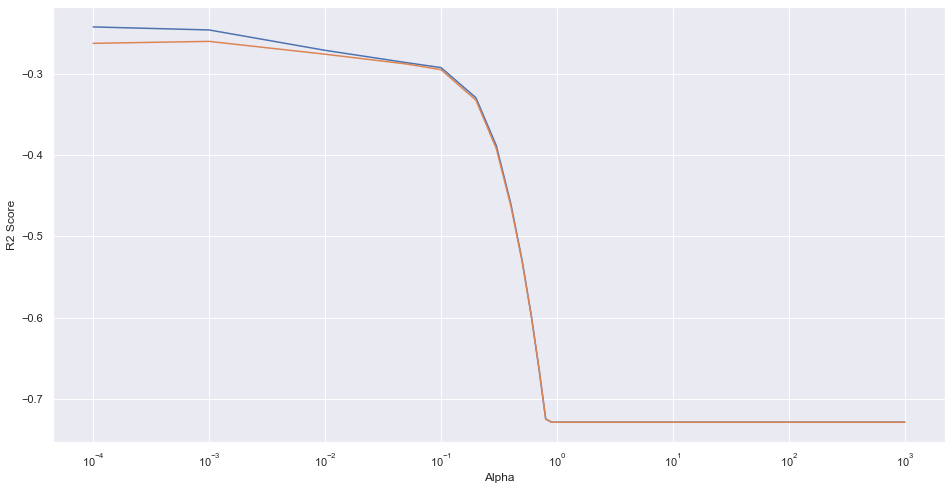

In [112]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [113]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [116]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
11,2ndFlrSF,0.378965
5,MasVnrArea,0.357189
17,TotRmsAbvGrd,0.334793
1,LotFrontage,0.330106
7,BsmtFinSF2,0.222251
14,FullBath,0.214404
47,Neighborhood_SawyerW,0.212342
37,Neighborhood_MeadowV,0.197075
6,BsmtFinSF1,0.155709
4,OverallCond,0.130248


In [115]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
ridge_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r-squared test: {r2_test_lr}")
ridge_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss train: {rss1_lr}")
ridge_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss test: {rss2_lr}")
ridge_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse train: {mse_train_lr}")
ridge_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse test: {mse_test_lr}")
ridge_metric.append(mse_test_lr**0.5)

r-squared train: 0.8549103795716058
r-squared test: 0.8456661605496758
rss train: 146.105247771393
rss test: 62.758833671148366
mse train: 0.14508962042839424
mse test: 0.14527507794247307


##### In summary, for ridge:
1. the best hyperparameter alpha is 9.0
2. r-squared train = 0.8549, r-squared test: 0.8456. 
3. There is slight improvement in r-squared test when compared to linear regression.
4. Top 5 features defining "SalePrice" are: <br>
   2ndFlrSF <br>
   MasVnrArea <br>
   TotRmsAbvGrd <br>
   LotFrontage <br>
   BsmtFinSF2 

## Lasso

In [117]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [119]:
#Fitting Ridge model for alpha = .001 and printing coefficients which have been penalised

alpha = .001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [120]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010308,0.001031,0.002244,0.000186,0.0001,{'alpha': 0.0001},-0.255522,-0.244849,-0.253077,-0.286570,...,-0.262374,0.014938,2,-0.241721,-0.245442,-0.246878,-0.237752,-0.239052,-0.242169,0.003530
1,0.004567,0.000623,0.002053,0.000285,0.0010,{'alpha': 0.001},-0.251832,-0.242477,-0.249548,-0.282817,...,-0.259965,0.015340,1,-0.247369,-0.247547,-0.251805,-0.240233,-0.242521,-0.245895,0.004081
2,0.002809,0.000198,0.001583,0.000037,0.0100,{'alpha': 0.01},-0.282305,-0.264697,-0.256130,-0.286308,...,-0.275743,0.012996,3,-0.273267,-0.271952,-0.278187,-0.265453,-0.266044,-0.270981,0.004755
3,0.002689,0.000087,0.001554,0.000041,0.0500,{'alpha': 0.05},-0.290606,-0.280095,-0.254626,-0.298800,...,-0.287754,0.020047,4,-0.285695,-0.287281,-0.293865,-0.284118,-0.279436,-0.286079,0.004694
4,0.002667,0.000354,0.001517,0.000203,0.1000,{'alpha': 0.1},-0.292460,-0.287875,-0.255452,-0.310230,...,-0.294819,0.024278,5,-0.292164,-0.294244,-0.295440,-0.291679,-0.287615,-0.292228,0.002682


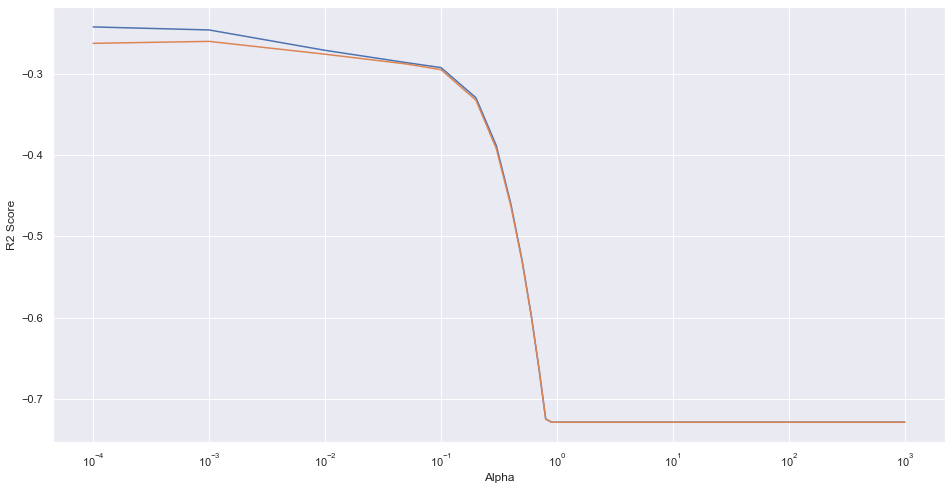

In [121]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [122]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [123]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [125]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
11,2ndFlrSF,0.440218
17,TotRmsAbvGrd,0.382255
5,MasVnrArea,0.364948
1,LotFrontage,0.323241
14,FullBath,0.291436
7,BsmtFinSF2,0.268478
47,Neighborhood_SawyerW,0.238632
37,Neighborhood_MeadowV,0.216368
6,BsmtFinSF1,0.151878
36,Neighborhood_IDOTRR,0.150033


In [126]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r-squared test: {r2_test_lr}")
lasso_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss train: {rss1_lr}")
lasso_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss test: {rss2_lr}")
lasso_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse train: {mse_train_lr}")
lasso_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse test: {mse_test_lr}")
lasso_metric.append(mse_test_lr**0.5)


r-squared train: 0.8563335249285049
r-squared test: 0.8434975049330312
rss train: 144.67214039699556
rss test: 63.64070311481502
mse train: 0.1436664750714951
mse test: 0.14731644239540514


##### In summary, for lasso:
1. the best hyperparameter alpha is 0.001
2. r-squared train = 0.8563, r-squared test: 0.8435. 
3. There is slight improvement in r-squared test when compared to linear regression.
4. Top 5 features defining "SalePrice" are: <br>
    2ndFlrSF <br>
    TotRmsAbvGrd <br>
    MasVnrArea <br>
    LotFrontage <br>
    FullBath

### Analyzing the three models wrt r-squared, rss and mse for train and test dataset respectively.

In [127]:
betas = pd.DataFrame(index=['r-squared train', 'r-squared test', 'rss train', 'rss test', 'mse train', 'mse test'], 
                     columns = ['Polynomial', 'Ridge', 'Lasso'])
betas['Polynomial'] = linear_regression_metric # Polynomial Regression
betas['Ridge'] = ridge_metric # Ridge Regression
betas['Lasso'] = lasso_metric # Lasso Regression
betas

,Polynomial,Ridge,Lasso
r-squared train,0.861158,0.854910,0.856334
r-squared test,0.834080,0.845666,0.843498
rss train,139.814058,146.105248,144.672140
rss test,67.470423,62.758834,63.640703
mse train,0.372615,0.380906,0.379034
mse test,0.395198,0.381150,0.383818


## Analyzing the changes in the coefficients after regularization

In [128]:
betas = pd.DataFrame(index=rfe_selected_columns)
betas.rows = rfe_selected_columns
betas['Linear'] = lm.coef_ # Polynomial Regression
betas['Ridge'] = ridge.coef_ # Ridge Regression
betas['Lasso'] = lasso.coef_ # Lasso Regression
betas

,Linear,Ridge,Lasso
OverallQual,0.304279,0.330106,0.323241
BsmtFinSF1,0.074438,0.089010,0.090700
BsmtUnfSF,-0.072041,-0.059520,-0.057489
TotalBsmtSF,0.140348,0.130248,0.125920
GrLivArea,0.372910,0.357189,0.364948
GarageArea,0.157092,0.155709,0.151878
Neighborhood_Crawfor,0.289623,0.222251,0.268478
Neighborhood_Edwards,-0.199830,-0.154884,-0.152453
Neighborhood_MeadowV,0.234691,0.116200,0.123545
Neighborhood_NWAmes,-0.199306,-0.171018,-0.166002
